# Sector Specific Opportunity Maps for Schools and Supermarkets

This notebook produces two additional maps that show opportunity zones for schools and supermarkets. These visualizations use the undersupply measures created in the combined opportunity index. They highlight areas where educational infrastructure or retail shopping is noticeably limited relative to the rest of the city.


In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# -----------------------------------------------------------
# 1. Load combined dataset and geometry
# -----------------------------------------------------------

df = pd.read_csv("../datasets/combined_opportunity_index_by_CA.csv")
df["ca_name"] = df["ca_name"].str.upper().str.strip()

ca_url = "https://data.cityofchicago.org/resource/igwz-8jzy.geojson"
ca = gpd.read_file(ca_url).to_crs("EPSG:4326")
ca = ca.rename(columns={"area_numbe": "ca_num", "community": "ca_name"})
ca["ca_num"] = ca["ca_num"].astype(int)
ca["ca_name"] = ca["ca_name"].str.upper().str.strip()

# Merge for mapping
gdf = ca.merge(df, on=["ca_num", "ca_name"], how="left")


<Figure size 1200x1000 with 0 Axes>

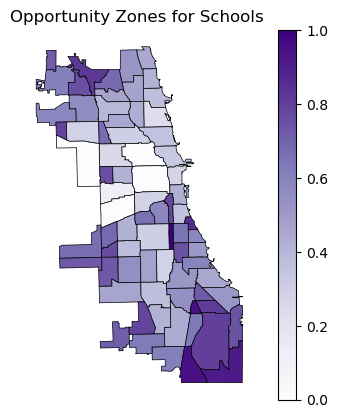

In [6]:
# -----------------------------------------------------------
# 2. Schools Opportunity Map
# -----------------------------------------------------------

plt.figure(figsize=(12, 10))
gdf.plot(
    column="schools_undersupply",
    cmap="Purples",
    legend=True,
    edgecolor="black",
    linewidth=0.5
)
plt.title("Opportunity Zones for Schools ")
plt.axis("off")
plt.savefig("mapa_oportunidad_schools.png", bbox_inches='tight', dpi=300)
plt.show()

<Figure size 1200x1000 with 0 Axes>

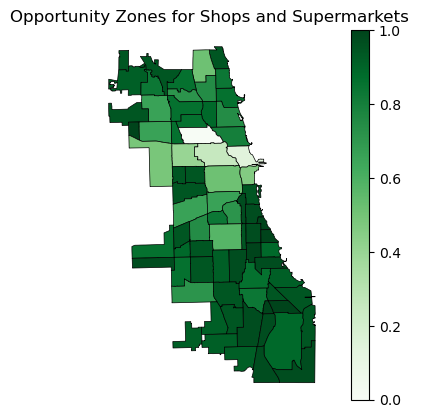

In [7]:
# -----------------------------------------------------------
# 3. Shops and Supermarkets Opportunity Map
# -----------------------------------------------------------

plt.figure(figsize=(12, 10))
gdf.plot(
    column="shops_undersupply",
    cmap="Greens",
    legend=True,
    edgecolor="black",
    linewidth=0.5
)
plt.title("Opportunity Zones for Shops and Supermarkets ")
plt.axis("off")
plt.savefig("mapa_oportunidad_shops.png", bbox_inches='tight', dpi=300)
plt.show()

<Figure size 1200x1000 with 0 Axes>

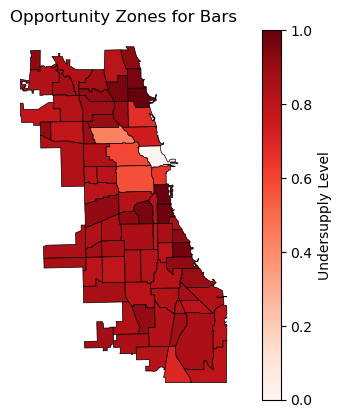

In [11]:
# -----------------------------------------------------------
# Bars Opportunity Map
# -----------------------------------------------------------

plt.figure(figsize=(12, 10))
gdf.plot(
    column="bars_undersupply",  # Columna de bares
    cmap="Reds",                # Mapa de color rojo
    legend=True,
    edgecolor="black",
    linewidth=0.5,
    legend_kwds={'label': "Undersupply Level"}
)
plt.title("Opportunity Zones for Bars")
plt.axis("off")
plt.savefig("mapa_oportunidad_bares.png", bbox_inches='tight', dpi=300)

plt.show()

<Figure size 1200x1000 with 0 Axes>

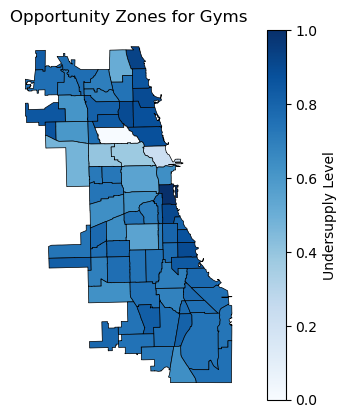

In [9]:
# -----------------------------------------------------------
# Gyms Opportunity Map
# -----------------------------------------------------------

plt.figure(figsize=(12, 10))
gdf.plot(
    column="gyms_undersupply",  # Columna de gimnasios
    cmap="Blues",               # Mapa de color azul
    legend=True,
    edgecolor="black",
    linewidth=0.5,
    legend_kwds={'label': "Undersupply Level"}
)
plt.title("Opportunity Zones for Gyms")
plt.axis("off")
plt.savefig("mapa_oportunidad_gym.png", bbox_inches='tight', dpi=300)
plt.show()